# Importing libraries

In [1]:
import pandas as pd 
import numpy as np

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

In [3]:
import plotly.figure_factory as ff
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True) #seaborn theme colour variations 

In [4]:
#Loading data into data frame
st=pd.read_csv('COVID-19 Survey Student Responses.csv')

In [5]:
# Displaying the first 5 rows of the dataset
st.head(5)

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,connected more with your family close friends relatives,What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [6]:
# Droping irrelevant colunms from the dataset
st=st.drop(['ID','Time spent on social media', 'Region of residence', 'Prefered social media platform', 'Time spent on TV', 'Time utilized'], axis=1)

In [7]:
#Renaming colunm titles 
st=st.rename(columns={"Age of Subject": "Age", "Rating of Online Class experience": "online class rating", "Medium for online class": "Devices Used", "Time spent on self study": "self study time", "Time spent on fitness": "Workout time", "Time spent on sleep": "sleeping hours", "Number of meals per day": "daily meals", "Change in your weight": "weight changes"})

In [8]:
#Checking data types
st.dtypes

Age                                                          int64
Time spent on Online Class                                 float64
online class rating                                         object
Devices Used                                                object
self study time                                            float64
Workout time                                               float64
sleeping hours                                             float64
daily meals                                                  int64
weight changes                                              object
Health issue during lockdown                                object
Stress busters                                              object
connected more with your family close friends relatives     object
What you miss the most                                      object
dtype: object

# Dropping the duplicate rows

In [9]:
#Checking for the number of rows and columns 
st.shape 

(1182, 13)

In [10]:
#checking for duplicate rows
duplicate_rows_st= st[st.duplicated()] 
print ("number of duplicate rows:", duplicate_rows_st.shape) 

number of duplicate rows: (3, 13)


In [11]:
st.count() #count the number of rows

Age                                                        1182
Time spent on Online Class                                 1182
online class rating                                        1158
Devices Used                                               1131
self study time                                            1182
Workout time                                               1182
sleeping hours                                             1182
daily meals                                                1182
weight changes                                             1182
Health issue during lockdown                               1182
Stress busters                                             1182
connected more with your family close friends relatives    1182
What you miss the most                                     1182
dtype: int64

In [12]:
st= st.drop_duplicates()
st.head(5)

,Age,Time spent on Online Class,online class rating,Devices Used,self study time,Workout time,sleeping hours,daily meals,weight changes,Health issue during lockdown,Stress busters,connected more with your family close friends relatives,What you miss the most
0,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,4,Increased,NO,Cooking,YES,School/college
1,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3,Decreased,NO,Scrolling through social media,NO,Roaming around freely
2,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,3,Remain Constant,NO,Listening to music,YES,Travelling
3,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,3,Decreased,NO,Watching web series,NO,"Friends , relatives"
4,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,4,Remain Constant,NO,Social Media,NO,Travelling


In [13]:
st.tail(5)

,Age,Time spent on Online Class,online class rating,Devices Used,self study time,Workout time,sleeping hours,daily meals,weight changes,Health issue during lockdown,Stress busters,connected more with your family close friends relatives,What you miss the most
1177,12,3.0,Good,Smartphone,4.0,1.0,8.0,3,Decreased,NO,Dancing,YES,Travelling
1178,14,6.0,Average,Smartphone,4.0,1.0,9.0,4,Remain Constant,NO,Listening to music,YES,"Friends , relatives"
1179,13,4.0,Average,Smartphone,0.0,0.5,8.0,4,Decreased,NO,Online gaming,YES,School/college
1180,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,4,Remain Constant,NO,Reading books,YES,School/college
1181,13,5.0,Good,Tablet,2.0,0.5,7.0,3,Remain Constant,NO,Talking,YES,School/college


# Dropping missing or null values

In [14]:
#count the number of rows
st.count()

Age                                                        1179
Time spent on Online Class                                 1179
online class rating                                        1155
Devices Used                                               1128
self study time                                            1179
Workout time                                               1179
sleeping hours                                             1179
daily meals                                                1179
weight changes                                             1179
Health issue during lockdown                               1179
Stress busters                                             1179
connected more with your family close friends relatives    1179
What you miss the most                                     1179
dtype: int64

In [15]:
print (st.isnull ().sum())

Age                                                         0
Time spent on Online Class                                  0
online class rating                                        24
Devices Used                                               51
self study time                                             0
Workout time                                                0
sleeping hours                                              0
daily meals                                                 0
weight changes                                              0
Health issue during lockdown                                0
Stress busters                                              0
connected more with your family close friends relatives     0
What you miss the most                                      0
dtype: int64


In [16]:
st = st.dropna()
st.count()

Age                                                        1128
Time spent on Online Class                                 1128
online class rating                                        1128
Devices Used                                               1128
self study time                                            1128
Workout time                                               1128
sleeping hours                                             1128
daily meals                                                1128
weight changes                                             1128
Health issue during lockdown                               1128
Stress busters                                             1128
connected more with your family close friends relatives    1128
What you miss the most                                     1128
dtype: int64

In [17]:
print (st.isnull ().sum())

Age                                                        0
Time spent on Online Class                                 0
online class rating                                        0
Devices Used                                               0
self study time                                            0
Workout time                                               0
sleeping hours                                             0
daily meals                                                0
weight changes                                             0
Health issue during lockdown                               0
Stress busters                                             0
connected more with your family close friends relatives    0
What you miss the most                                     0
dtype: int64


# Detecting Outliers

<AxesSubplot:xlabel='Age'>

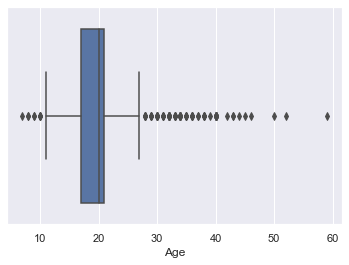

In [18]:
sns.boxplot (x=st['Age']) #outliers on student's age 

<AxesSubplot:xlabel='Time spent on Online Class'>

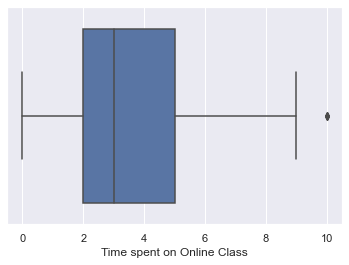

In [19]:
sns.boxplot (x=st['Time spent on Online Class']) #outlier based on the time spent in class

C:\Users\bimbo\Anaconda3\envs\Eda Project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


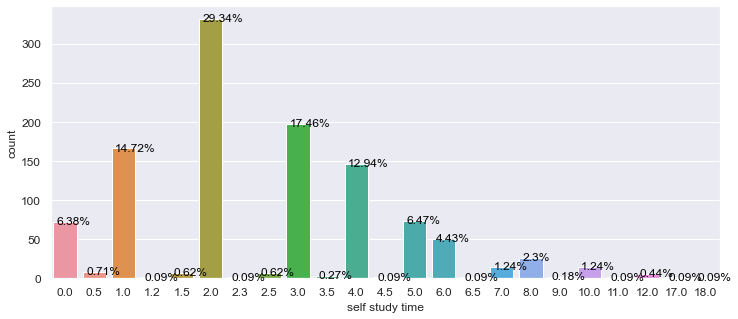

In [20]:
plt.figure(figsize =(12,5))
ax = sns.countplot('self study time', data = st)
plt.xticks(size = 12)
plt.xlabel('self study time', size =12)
plt.yticks(size = 12)
plt.ylabel('count', size =12)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='black')

# Using charts to create visuals

C:\Users\bimbo\Anaconda3\envs\Eda Project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


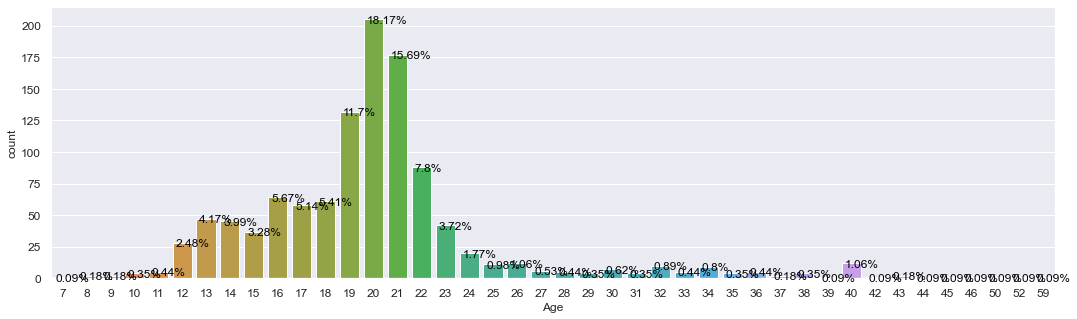

In [21]:
plt.figure(figsize =(18,5))
ax = sns.countplot('Age', data = st)
plt.xticks(size = 12)
plt.xlabel('Age', size =12)
plt.yticks(size = 12)
plt.ylabel('count', size =12)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='black')

Count Plot Charts 

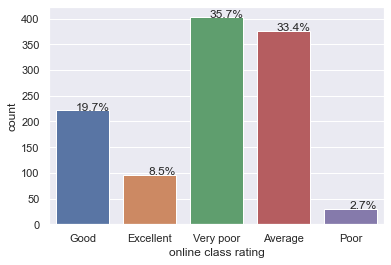

In [22]:
#Plot Chart
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="online class rating", data=st)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

C:\Users\bimbo\Anaconda3\envs\Eda Project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


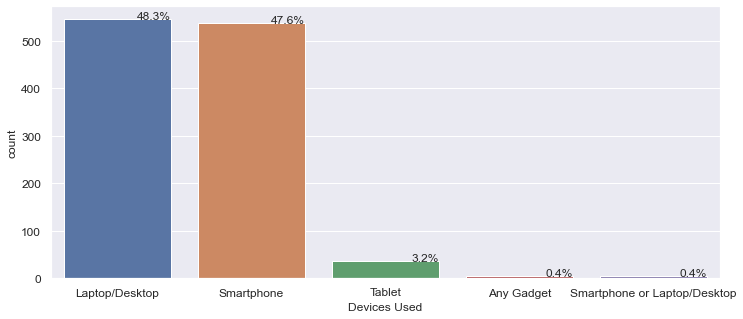

In [23]:
plt.figure(figsize =(12,5))
ax = sns.countplot('Devices Used', data = st)
plt.xticks(size = 12)
plt.xlabel('Devices Used', size =12)
plt.yticks(size = 12)
plt.ylabel('count', size =12)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

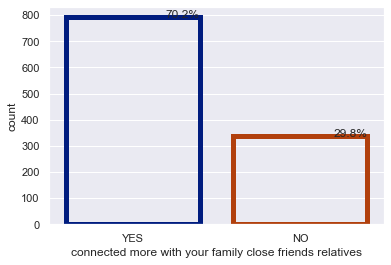

In [24]:
ax = sns.countplot(x="connected more with your family close friends relatives", data=st,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

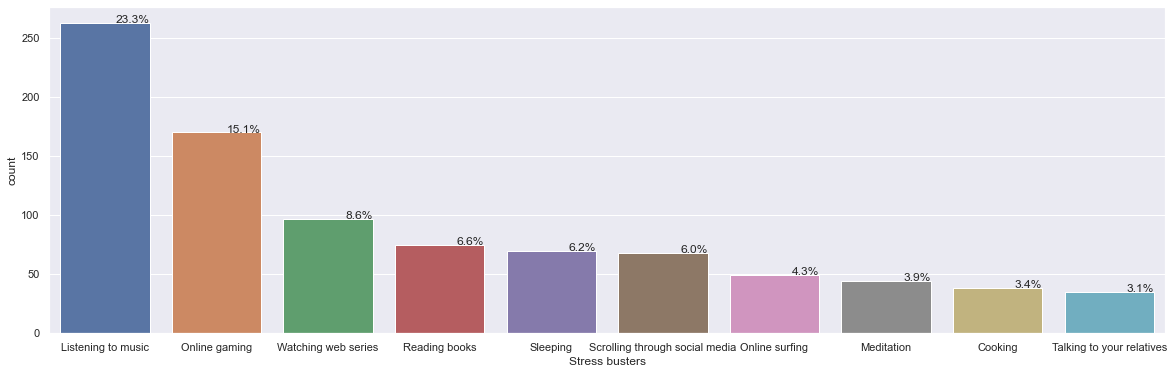

In [25]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20, 6)) 
ax = sns.countplot(x="Stress busters", data=st, order=st['Stress busters'].value_counts().iloc[:10].index)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

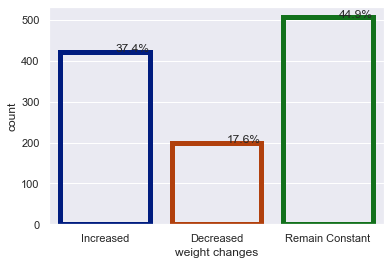

In [26]:
ax = sns.countplot(x="weight changes", data=st,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

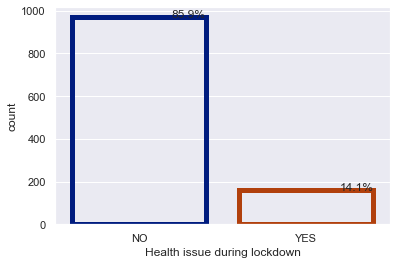

In [27]:
ax = sns.countplot(x="Health issue during lockdown", data=st,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

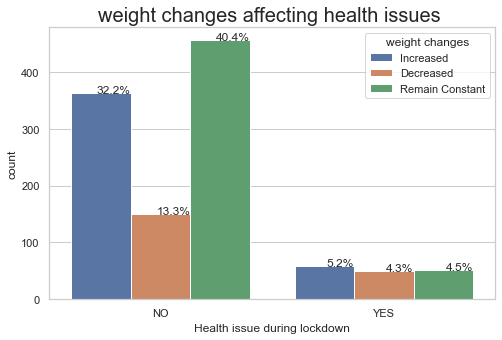

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(st))
ax = sns.countplot(x="Health issue during lockdown", hue="weight changes", data=st)
plt.title('weight changes affecting health issues ', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

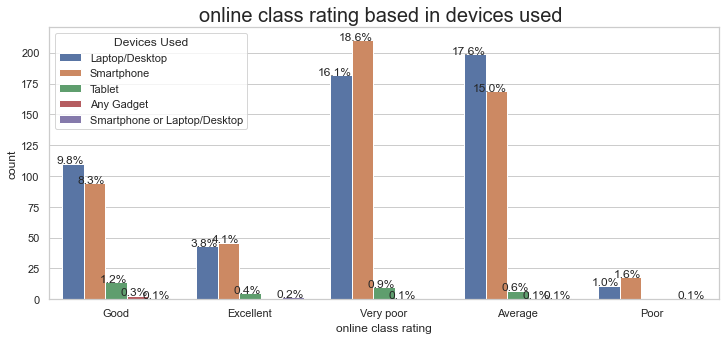

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
total = float(len(st))
ax = sns.countplot(x="online class rating", hue="Devices Used", data=st)
plt.title('online class rating based in devices used ', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

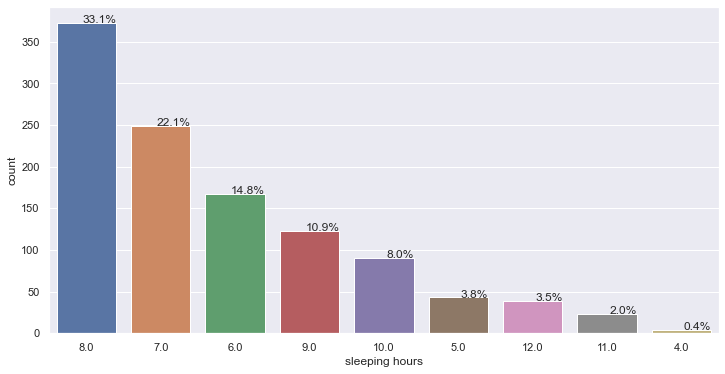

In [30]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12, 6)) 
ax = sns.countplot(x="sleeping hours", data=st, order=st['sleeping hours'].value_counts().iloc[:9].index)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

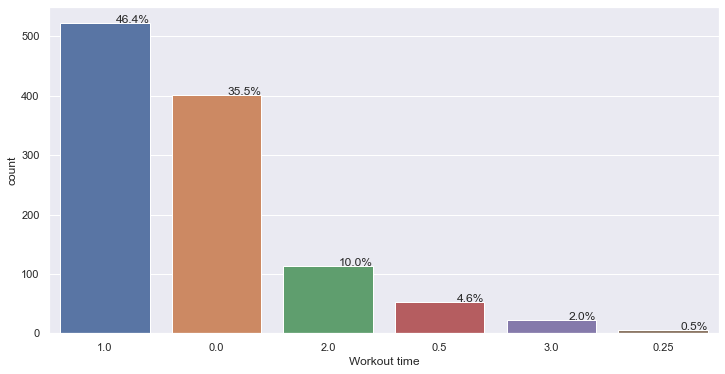

In [31]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12, 6)) 
ax = sns.countplot(x="Workout time", data=st, order=st['Workout time'].value_counts().iloc[:6].index)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

Histogram

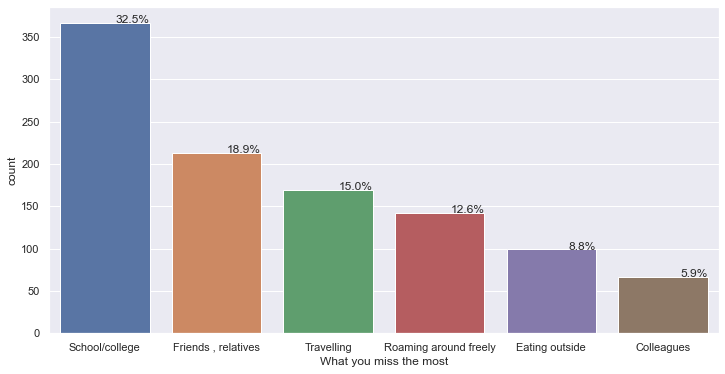

In [32]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12, 6)) 
ax = sns.countplot(x="What you miss the most", data=st, order=st['What you miss the most'].value_counts().iloc[:6].index)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()